In [ ]:
!pip install PyGithub
import pandas as pd
import requests
import io
import numpy as np  
from datetime import date, timedelta
import re
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from github import Github
import github
import torch
import torch.nn as nn
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader
# Import nn.functional
import torch.nn.functional as F
import torch.optim as optim
from typing import Union, Tuple
import os
import sys
import time
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import math
import random
import imageio
#from sklearn.metrics import mean_absolute_percentage_error
matplotlib.style.use('seaborn')
%matplotlib inline
#random.seed(42)
#torch.manual_seed(42)
#np.random.seed(42)

     |████████████████████████████████| 296kB 29.6MB/s 
     |████████████████████████████████| 962kB 48.9MB/s 


In [ ]:
url=	'https://api.covid19india.org/csv/latest/states.csv'
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()    

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [ ]:
Indian_States_population={'UttarPradesh':199812341,
'Maharashtra':112374333,
'Bihar':104099452,
'WestBengal':91276115,
'Telangana':35193978,
'AndhraPradesh':49386799,
'MadhyaPradesh':72626809,
'TamilNadu':72147030,
'Rajasthan':68548437,
'Karnataka':61095297,
'Gujarat':60439692,
'Odisha':41974218,
'Kerala':33406061,
'Jharkhand':32988134,
'Assam':31205576,
'Punjab':27743338,
'Chhattisgarh':25545198,
'Haryana':25351462,
'Delhi':16787941,
'JammuandKashmir':12541302,
'Uttarakhand':10086292,
'HimachalPradesh':6864602,
'Tripura':3673917,
'Meghalaya':2966889,
'Manipur':2855794,
'Nagaland':1978502,
'Goa':1458545,
'ArunachalPradesh':1383727,
'Puducherry':1247953,
'Mizoram':1097206,
'Chandigarh':1055450,
'Sikkim':610577,
'AndamanandNicobarIslands':380581,
'DadraandNagarHaveliandDamanandDiu':586956,
'Lakshadweep':64473
}

In [ ]:
data=df[df['State']!='India'].copy()
grouped_df = data.groupby("State")['Confirmed']
maximums = grouped_df.max()
maximums = maximums.reset_index()

In [ ]:
maximums
relative_values=[]
for st,cn in zip(maximums['State'],maximums['Confirmed']):
  if ''.join(st.split()) in Indian_States_population:
    temp=cn / Indian_States_population[''.join(st.split())]
    relative_values.append(temp)
  else:
    relative_values.append(None)

In [ ]:
maximums['relative_values']=relative_values

In [ ]:
#data=df[df['State']!='India'].copy()
#grouped_df = data.groupby("State")['Confirmed']
#maximums = grouped_df.max()
#maximums = maximums.reset_index()

max_confirmed_cases_state_list=maximums.sort_values(by="relative_values",ascending=False)


In [ ]:
#top 5 states with highest confirmed cases relatively
max_confirmed_cases_state_list


,State,Confirmed,relative_values
18,Lakshadweep,9715,0.150683
9,Goa,166449,0.114120
26,Puducherry,116985,0.093742
16,Kerala,2896958,0.086720
8,Delhi,1434094,0.085424
5,Chandigarh,61632,0.058394
20,Maharashtra,6043548,0.053781
15,Karnataka,2840428,0.046492
6,Chhattisgarh,993694,0.038899
1,Andhra Pradesh,1885716,0.038183


In [ ]:
max_confirmed_cases_state_list=maximums.sort_values(by="relative_values",ascending=False)[:10]['State']
max_confirmed_cases_state_list

18       Lakshadweep
9                Goa
26        Puducherry
16            Kerala
8              Delhi
5         Chandigarh
20       Maharashtra
15         Karnataka
6       Chhattisgarh
1     Andhra Pradesh
Name: State, dtype: object

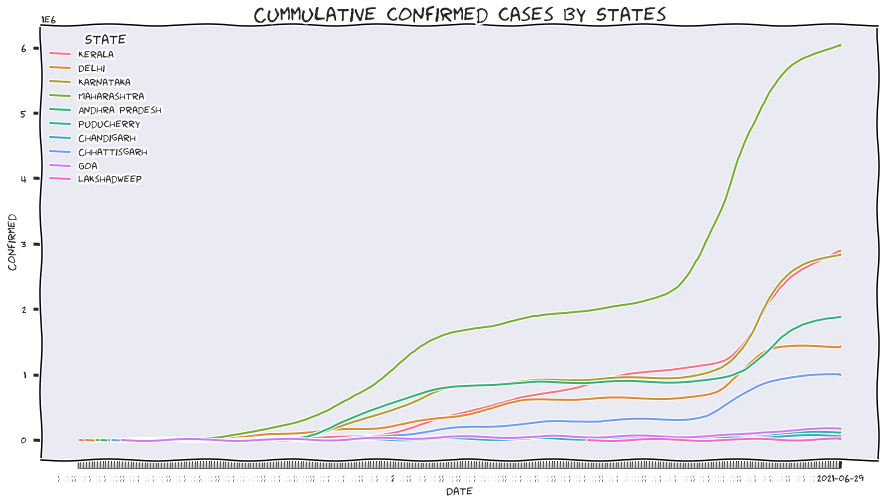

In [ ]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['State'].isin(max_confirmed_cases_state_list)],x='Date',y='Confirmed',hue='State')
    ax.set_title("Cummulative confirmed cases by States", size=20)

In [ ]:
def github_upload(folder_name,file_name,file_data):
  g = Github("")
  GITHUB_REPO='Data-Science-in-Life-Science-Project'
  repo = g.get_user().get_repo(GITHUB_REPO)
  all_files = []
  contents = repo.get_contents("")
  while contents:
      file_content = contents.pop(0)
      if file_content.type == "dir":
          contents.extend(repo.get_contents(file_content.path))
      else:
          file = file_content
          all_files.append(str(file).replace('ContentFile(path="','').replace('")',''))

  content = file_data
  
  # Upload to github
  git_prefix = folder_name+'/'
  git_file = git_prefix + file_name
  if git_file in all_files:
      contents = repo.get_contents(git_file)
      repo.update_file(contents.path, "committing files", content, contents.sha, branch="main")
      print(git_file + ' UPDATED')
  else:
      repo.create_file(git_file, "committing files", content, branch="main")
      print(git_file + ' CREATED')

In [ ]:
for state in max_confirmed_cases_state_list:
  content=df[df["State"]==state].copy()
  temp=content
  temp['New_Confirmerd']=np.NaN
  temp['New_Deaths']=np.NaN
  temp['New_Recovered']=np.NaN

  temp_new_Confirmerd=np.array(temp['Confirmed'][1:])-np.array(temp['Confirmed'][:-1])
  temp['New_Confirmerd'][1:]=temp_new_Confirmerd
  temp_new_Deaths=np.array(temp['Deceased'][1:])-np.array(temp['Deceased'][:-1])
  temp['New_Deaths'][1:]=temp_new_Deaths
  temp_new_Recovered=np.array(temp['Recovered'][1:])-np.array(temp['Recovered'][:-1])
  temp['New_Recovered'][1:]=temp_new_Recovered
  content=temp
  #github_upload(folder_name='Indian-States-Covid19-Datasets',file_name="-".join(state.split())+'.csv', file_data=content.to_csv())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Indian-States-Covid19-Datasets/Uttar-Pradesh.csv UPDATED
Indian-States-Covid19-Datasets/Tamil-Nadu.csv UPDATED


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, response_variable_index=0, number_feature = 6):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),:number_feature]
    dataX.append(a)
    dataY.append(dataset[i + look_back, response_variable_index])
  return np.array(dataX), np.array(dataY)

In [ ]:
def data_preparation(df, scaling_range=(0,1),time_step=5,number_feature=6, response_variable_index=3,data_split_ratio=0.8,Suffle=True):
    df = df.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=scaling_range)
    dataset = scaler.fit_transform(df.copy())
    X, Y = create_dataset(dataset, time_step,response_variable_index=response_variable_index, number_feature=number_feature)
    # split into train and test sets
    train_size = int(len(dataset) * data_split_ratio)
    test_size = len(dataset) - train_size
    trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
    trainY, testY = Y[0:train_size], Y[train_size:len(dataset)]
    print(trainX.shape)
    # reshape input to be [samples, time steps, features]
    if not multi_feature:
      trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
      testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))
    #print(trainX.shape)
    X_train=trainX
    X_test=testX
    y_train=trainY.reshape(-1,1)

    print(X_train.shape, y_train.shape)
    # summarize the data
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)
    # Define dataset
    train_ds = TensorDataset(inputs, targets)

    batch_size = 16
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=Suffle)

    y_test=testY.reshape(-1,1)

    inputs = torch.from_numpy(X_test)
    targets = torch.from_numpy(y_test)
    # Define dataset
    #test_ds = TensorDataset(inputs, targets)
    test_ds=(inputs, targets)
    #test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
    return train_loader, test_ds,scaler

In [ ]:
def fit(
    model: nn.Module, 
    optimizer: optim.Optimizer, criterion: nn,
    data: Union[DataLoader, Tuple[DataLoader]], 
    max_epochs: int, 
    cuda=True):
  use_test = False
  if isinstance(data, DataLoader):
    train_loader = data
  elif isinstance(data, tuple):
    if len(data) == 2:
      train_loader, test_loader = data
      if not isinstance(train_loader, DataLoader):
        raise TypeError(f'Expected 1st entry of type DataLoader, but got {type(train_loader)}!')
      #if not isinstance(test_loader, DataLoader):
       # raise TypeError(f'Expected 2nd entry of type DataLoader, but got {type(test_loader)}!')
      use_test = True
    else:
      raise ValueError(f'Expected tuple of length 2, but got {len(data)}!')
  
  
  #criterion = nn.L1Loss()
  model.train()
  losses = []
  test_losses=[]
  batch_total = len(train_loader)
  best_model=None
  min_loss=np.iinfo(0).max
  for epoch in range(max_epochs):
    #random.seed(42)
    #torch.manual_seed(42)
    #np.random.seed(42)
    running_loss=[]
    test_loss=[]
    for batch_idx, batch in enumerate(train_loader):
      x, y = batch
      if cuda:
        x, y = x.cuda(), y.cuda()
      output = model(x)
      loss = criterion(output, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      running_loss.append(loss.item())
      #rmse += torch.sqrt(criterion(yhat, y))
      #losses.append(loss.item())
      
    if use_test:
      model.eval()
      test_x, test_y =test_loader
      if cuda:
        test_x, test_y = test_x.cuda(), test_y.cuda()
      test_output = model(test_x)
      loss = criterion(test_output, test_y)
      test_loss.append(loss.item())
      #test_mae = criterion(test_output, test_y)
      test_x
      #predictions = scaler.inverse_transform(test_output.cpu().detach().numpy())
      #test_y = scaler.inverse_transform(test_y.cpu().detach().numpy())
      epoch_loss = mean_squared_error(test_y.cpu().detach().numpy(),test_output.cpu().detach().numpy())
      if epoch_loss<min_loss:
        min_loss = epoch_loss
        best_model= model.state_dict()
      test_losses.append(loss.item())
      model.train()
      if epoch%50==0:
        sys.stdout.write(f'\rEpoch: {epoch}/{max_epochs}  Loss: {mean(running_loss):.6f} Test loss: {epoch_loss:.6f}')
    else:
      sys.stdout.write(f'\rEpoch: {epoch}/{max_epochs}  Loss: {running_loss:.6f}' )
    epoch_loss =mean(running_loss)
    losses.append(epoch_loss)
  return (losses, test_losses, best_model)

In [ ]:
def predict(model: nn.Module, data: DataLoader, cuda=True):
  predictions=None
  model.eval()
  for id,(x, y) in enumerate(data):
      if id==0:
        predictions=model(x)
      else:
        output = model(x)
        predictions=torch.vstack((predictions,output))
  return predictions
def plot_predictions(model, data_loader):
  
  predictions=predict(model, data_loader)

  train_y = y_train

  test_y=y_test
  predictions=predictions.cpu()
  plt.plot(range(len(train_y)),train_y, label='train data')
  plt.plot(np.arange(len(train_y),len(train_y)+len(test_y),1),test_y,label='Acutal')
  plt.plot(np.arange(len(train_y),len(train_y)+len(test_y),1),predictions.detach().numpy(),label='predictions')
  plt.legend()
  
def plot_loss(epochs,train_losses,test_losses,model_name):
  plt.rcParams['figure.figsize'] = [10, 5]
  plt.rcParams['figure.dpi'] = 100
  plt.plot(range(epochs),train_losses, label='train loss')
  plt.plot(range(epochs),test_losses,label='test loss')
  plt.title(model_name)
  plt.legend()
  plt.show()

In [ ]:
class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

class CNNModel(nn.Module):
  def __init__(self, time_step,n_layers,vector_length,kernel_size):
    super(CNNModel, self).__init__()
    self.time_step=time_step
    self.n_layers=n_layers
    in_channels=1
    out_channels=16
    layers=[]
    dimension=vector_length
    for l in range(self.n_layers):
        cnn_1d_layer=nn.Conv1d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding="same")
        #dimension=dimension-kernel_size+2*1+1
        #if dimension>1:
        layers.append(cnn_1d_layer)
        if l%2==0:
          layers.append(nn.Tanh())
        else:
          layers.append(nn.ELU(inplace=True))
        in_channels=out_channels
        out_channels=out_channels*2
    layers.append(Flatten())
    layers.append(nn.Dropout(p=0.2))
    self.body = nn.Sequential(*layers)
    #print('dm',dimension,out_channels)
    out=int(vector_length*(out_channels/2))
    self.head=nn.Linear(out, 1)
  def forward(self, x):
    b, features, look_back = x.shape
    #print(b,n_steps, features)
    x = x.reshape([b,1,features*look_back])
    y = self.body(x)
    #print(y.shape)
    #print('re',y.view(len(y),-1).shape)
    return self.head(y.view(len(y),-1))

In [ ]:
Shortlisted_States=['Maharashtra','Delhi','Uttar-Pradesh','Kerala','Tamil-Nadu']
results_cnn=[]
for state in Shortlisted_States:
  best_models=[]
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Covid19-Datasets/"+state+".csv", parse_dates=["Date"]).drop(columns =["Unnamed: 0"])
  df = df[df["Date"] > "2020-03-19"]
  df = df.set_index("Date")
  df = df[['Confirmed', 'Recovered', 'Deceased', 'New_Confirmerd', 'New_Deaths', 'New_Recovered']]
  #print(df.describe())

  time_step=[5,7,15,30]
  Number_of_feature=[1,2,3,4,5,6]
  multi_feature=True
  
  for n_f in Number_of_feature:
    for t_s in time_step:
      train_loader, test_loader,scaler = data_preparation(df, scaling_range=(0,1),time_step=t_s,number_feature=n_f, response_variable_index=0,data_split_ratio=0.8)
      for n_layers in range(2,5,1):
        for kernel_size in range(1,5,1):
          
          max_epochs=25
          #random.seed(42)
          #torch.manual_seed(42)
          #np.random.seed(42)
          #CNN model with L1 loss
          #best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
          CNN_model =  CNNModel(t_s,n_layers,t_s*n_f,kernel_size)
          cuda=torch.cuda.is_available()
          if cuda:
            CNN_model = CNN_model.cuda()
          optimizer = optim.SGD(CNN_model.parameters(), lr=1e-2, momentum=0.9)
          train_losses,test_losses, best_model = fit(CNN_model, optimizer, nn.L1Loss(),(train_loader, test_loader), max_epochs=max_epochs,cuda=cuda)
          end = time.time()
          #print(f'\nTraining took {end-start}s!')
          #plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
          CNN_model =  CNNModel(t_s,n_layers,t_s*n_f,kernel_size)
          CNN_model.load_state_dict(best_model)
          CNN_model.eval()
          test_x,test_y=test_loader
          predictions=CNN_model(test_x)
          test_y=test_y.cpu().detach().numpy()
          predictions=predictions.cpu().detach().numpy()
          #predictions = scaler.inverse_transform(predictions)
          #target = scaler.inverse_transform(target)
          mae=mean_absolute_error(test_y,predictions)
          rmse=math.sqrt(mean_squared_error(test_y,predictions))
          #mape=mean_absolute_percentage_error(test_y,predictions)
          r2s=r2_score(test_y,predictions)
          results_cnn.append([state,n_f,t_s,n_layers,kernel_size,mae,rmse,r2s])
          print(state,'n_f',n_f,'t_s',t_s,'n_layers',n_layers,'kernel_size',kernel_size,mae,rmse,r2s)
      #CNN_model =  CNNModel(t_s,n_layers,t_s*n_f,kernel_size)
      #CNN_model.load_state_dict(best_model)

(376, 5, 1)
(376, 5, 1) (376, 1)
Epoch: 0/25  Loss: 0.175288 Test loss: 0.354096Maharashtra n_f 1 t_s 5 n_layers 2 kernel_size 1 0.05827114 0.0595810911714283 0.84611007269335
Epoch: 0/25  Loss: 0.153693 Test loss: 0.414375Maharashtra n_f 1 t_s 5 n_layers 2 kernel_size 2 0.08740612 0.09219783607826049 0.6315022837085222
Epoch: 0/25  Loss: 0.134567 Test loss: 0.440629Maharashtra n_f 1 t_s 5 n_layers 2 kernel_size 3 0.1310752 0.13445280921761527 0.2163302179878409
Epoch: 0/25  Loss: 0.207746 Test loss: 0.294709Maharashtra n_f 1 t_s 5 n_layers 2 kernel_size 4 0.105786905 0.11199815213991934 0.45623028064664406
Epoch: 0/25  Loss: 0.327033 Test loss: 0.882064Maharashtra n_f 1 t_s 5 n_layers 3 kernel_size 1 0.5928882 0.6116461368497107 -15.217868232898866
Epoch: 0/25  Loss: 0.691159 Test loss: 0.033712Maharashtra n_f 1 t_s 5 n_layers 3 kernel_size 2 0.5774797 0.596219498755883 -14.410107393425816
Epoch: 0/25  Loss: 0.318241 Test loss: 1.230618Maharashtra n_f 1 t_s 5 n_layers 3 kernel_size 3 

In [ ]:
df_cnn = pd.DataFrame (results_cnn,columns=['State','Number_feature','Time_Step','number_layers','kernel_size','MAE','RMSE','R2_Score'])
df_cnn.head()

,State,Number_feature,Time_Step,number_layers,kernel_size,MAE,RMSE,R2_Score
0,Maharashtra,1,5,2,1,0.058271,0.059581,0.846110
1,Maharashtra,1,5,2,2,0.087406,0.092198,0.631502
2,Maharashtra,1,5,2,3,0.131075,0.134453,0.216330
3,Maharashtra,1,5,2,4,0.105787,0.111998,0.456230
4,Maharashtra,1,5,3,1,0.592888,0.611646,-15.217868


In [ ]:
df_cnn.groupby(['State','Number_feature']).max()

Time_Step  number_layers  ...      RMSE  R2_Score
State         Number_feature                            ...                    
Delhi         1                      30              4  ...  0.769843  0.987849
              2                      30              4  ...  1.125278  0.839550
              3                      30              4  ...  0.739141  0.980252
              4                      30              4  ...  0.769095  0.885184
              5                      30              4  ...  0.842961  0.941584
              6                      30              4  ...  0.886274  0.817127
Kerala        1                      30              4  ...  0.765840  0.972213
              2                      30              4  ...  0.718077  0.983431
              3                      30              4  ...  0.769600  0.914263
              4                      30              4  ...  0.748894  0.869102
              5                      30              4  ...  0.783447  0.769558
              6                      30              4  ...  0.729610  0.885396
Maharashtra   1                      30              4  ...  0.781633  0.989663
              2                      30              4  ...  0.812250  0.955263
              3                      30              4  ...  0.829675  0.542832
              4                      30              4  ...  0.690481  0.975500
              5                      30              4  ...  0.737193 -1.647117
              6                      30              4  ...  0.730022 -1.551562
Tamil-Nadu    1                      30              4  ...  0.612487  0.993638
              2                      30              4  ...  0.596262  0.945268
              3                      30              4  ...  0.587448  0.935728
              4                      30              4  ...  0.591136  0.937453
              5                      30              4  ...  0.634789  0.959004
              6                      30              4  ...  0.715727  0.815864
Uttar-Pradesh 1                      30              4  ...  0.858712  0.921817
              2                      30              4  ...  0.731341  0.942082
              3                      30              4  ...  0.700124  0.778236
              4                      30              4  ...  0.680107  0.050224
              5                      30              4  ...  0.748858  0.385666
              6                      30              4  ...  0.769048  0.605873

[30 rows x 6 columns]

In [ ]:
github_upload(folder_name='Indian-States-Model-Results',file_name='CNN.csv', file_data=df_cnn.to_csv())

Indian-States-Model-Results/CNN.csv UPDATED


In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, layers,output_dim):
    super(MLP, self).__init__()
    self.input_dim=input_dim
    self.n_layers=layers
    self.output_dim=output_dim
    in_features=input_dim
    out_features=16
    layers=[]
    for l in range(self.n_layers):
        if l==(self.n_layers-1):
          layers.append(nn.Linear(in_features=in_features, out_features=self.output_dim))
        else:
          layers.append(nn.Linear(in_features=in_features, out_features=out_features))
        if l%2==0:
          layers.append(nn.Tanh())
        else:
          layers.append(nn.ELU(inplace=True))
        in_features=out_features
        out_features=int(out_features/2)
    self.body = nn.Sequential(*layers)
  def forward(self, x):
    b, n_steps, features = x.shape
    #print(b,n_steps, features)
    x = x.reshape([b,n_steps*features])
    return self.body(x)

In [ ]:
Shortlisted_States=['Maharashtra','Delhi','Uttar-Pradesh','Kerala','Tamil-Nadu']
results_mlp=[]
for state in Shortlisted_States:
  best_models=[]
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Covid19-Datasets/"+state+".csv", parse_dates=["Date"]).drop(columns =["Unnamed: 0"])
  df = df[df["Date"] > "2020-03-19"]
  df = df.set_index("Date")
  df = df[['Confirmed', 'Recovered', 'Deceased', 'New_Confirmerd', 'New_Deaths', 'New_Recovered']]
  #print(df.describe())

  time_step=[5,7,15,30]
  Number_of_feature=[1,2,3,4,5,6]
  multi_feature=True
  for n_f in Number_of_feature:
    for t_s in time_step:
      train_loader, test_loader = data_preparation(df, scaling_range=(0,1),time_step=t_s,number_feature=n_f, response_variable_index=0,data_split_ratio=0.8)
      for n_layers in range(1,3,1):
          print(state,'n_f',n_f,'t_s',t_s,'n_layers',n_layers,'Error',mae,rmse,r2s)
          max_epochs=20
          random.seed(42)
          torch.manual_seed(42)
          np.random.seed(42)
          #CNN model with L1 loss
          #best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
          fc_model = MLP(input_dim=n_f*t_s, layers=n_layers,output_dim=1)
          cuda=torch.cuda.is_available()
          if cuda:
            fc_model = fc_model.cuda()
          fc_optim = optim.SGD(fc_model.parameters(), lr=1e-2, momentum=0.9)
          #fc_optim = optim.Adam(fc_model.parameters(), lr=1e-3)
          train_losses,test_losses,best_model = fit(fc_model, fc_optim,nn.L1Loss(),(train_loader, test_loader), max_epochs=max_epochs,cuda=cuda)
          #print(f'\nTraining took {end-start}s!')
          #plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
          fc_model = MLP(input_dim=n_f*t_s, layers=n_layers,output_dim=1)
          fc_model.load_state_dict(best_model)
          fc_model.eval()
          test_x,test_y=test_loader
          predictions=fc_model(test_x)
          test_y=test_y.cpu().detach().numpy()
          predictions=predictions.cpu().detach().numpy()
          mae=mean_absolute_error(test_y,predictions)
          rmse=math.sqrt(mean_squared_error(test_y,predictions))
          #mape=mean_absolute_percentage_error(test_y,predictions)
          r2s=r2_score(test_y,predictions)
          results_mlp.append([state,n_f,t_s,n_layers,mae,rmse,r2s])
          #print(state,n_f,t_s,n_layers,mae,rmse,r2s)

(373, 5, 1)
(373, 5, 1) (373, 1)
Maharashtra n_f 1 t_s 5 n_layers 1 Error 0.16565773 0.1922714375745338 -0.08348091032129012
Epoch: 0/20  Loss: 0.208140 Test loss: 0.174539Maharashtra n_f 1 t_s 5 n_layers 2 Error 0.14426535 0.1556132933798118 0.08110207142784154
Epoch: 0/20  Loss: 0.152276 Test loss: 0.091250(373, 7, 1)
(373, 7, 1) (373, 1)
Maharashtra n_f 1 t_s 7 n_layers 1 Error 0.10514479 0.11151117618185725 0.528142741227102
Epoch: 0/20  Loss: 0.103017 Test loss: 0.034956Maharashtra n_f 1 t_s 7 n_layers 2 Error 0.15444653 0.16532579039563985 -0.1284937090488647
Epoch: 0/20  Loss: 0.141786 Test loss: 0.037977(373, 15, 1)
(373, 15, 1) (373, 1)
Maharashtra n_f 1 t_s 15 n_layers 1 Error 0.09231327 0.09615311610880055 0.6182801945167157
Epoch: 0/20  Loss: 0.119366 Test loss: 0.030537Maharashtra n_f 1 t_s 15 n_layers 2 Error 0.16030023 0.16760361706525248 -0.7198608138344345
Epoch: 0/20  Loss: 0.076376 Test loss: 0.001105(373, 30, 1)
(373, 30, 1) (373, 1)
Maharashtra n_f 1 t_s 30 n_layer

In [ ]:
df_mlp = pd.DataFrame (results_mlp,columns=['State','Number_feature','Time_Step','number_layers','MAE','RMSE','R2_Score'])
df_mlp.head()

,State,Number_feature,Time_Step,number_layers,MAE,RMSE,R2_Score
0,Maharashtra,1,5,1,0.144265,0.155613,0.081102
1,Maharashtra,1,5,2,0.105145,0.111511,0.528143
2,Maharashtra,1,7,1,0.154447,0.165326,-0.128494
3,Maharashtra,1,7,2,0.092313,0.096153,0.618280
4,Maharashtra,1,15,1,0.160300,0.167604,-0.719861


In [ ]:
github_upload(folder_name='Indian-States-Model-Results',file_name='MLP.csv', file_data=df_mlp.to_csv())

Indian-States-Model-Results/MLP.csv CREATED


In [ ]:
df_mlp.groupby(['State','Number_feature']).max()

Time_Step  number_layers  ...      RMSE  R2_Score
State         Number_feature                            ...                    
Delhi         1                      30              2  ...  0.190147  0.826755
              2                      30              2  ...  0.224224  0.639901
              3                      30              2  ...  0.219653  0.397474
              4                      30              2  ...  0.272403  0.716689
              5                      30              2  ...  0.250524  0.825155
              6                      30              2  ...  0.182276  0.679715
Kerala        1                      30              2  ...  0.174822  0.762714
              2                      30              2  ...  0.183242  0.773304
              3                      30              2  ...  0.230282  0.756989
              4                      30              2  ...  0.242035  0.910945
              5                      30              2  ...  0.184943  0.706037
              6                      30              2  ...  0.237106  0.779560
Maharashtra   1                      30              2  ...  0.187687  0.896137
              2                      30              2  ...  0.179110  0.634546
              3                      30              2  ...  0.228876  0.879576
              4                      30              2  ...  0.187363  0.514810
              5                      30              2  ...  0.264722 -0.024054
              6                      30              2  ...  0.237507 -0.084871
Tamil-Nadu    1                      30              2  ...  0.171363  0.856808
              2                      30              2  ...  0.194145  0.850898
              3                      30              2  ...  0.266070  0.799261
              4                      30              2  ...  0.203731  0.801294
              5                      30              2  ...  0.228817  0.726072
              6                      30              2  ...  0.264075  0.721946
Uttar-Pradesh 1                      30              2  ...  0.196611  0.927715
              2                      30              2  ...  0.243855  0.608825
              3                      30              2  ...  0.283310  0.637678
              4                      30              2  ...  0.212402  0.573836
              5                      30              2  ...  0.220672  0.615815
              6                      30              2  ...  0.207441  0.657279

[30 rows x 5 columns]

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim,  output_dim,num_layers, seq_length):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        self.seq_length=seq_length
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.relu = nn.ELU()
        # Readout layer
        print(output_dim)
        self.fc = nn.Linear(hidden_dim*self.seq_length, output_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        x = out.contiguous().view(batch_size,-1)
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(self.relu(x)) 
        # out.size() --> 100, 10
        return out
    


In [ ]:
Shortlisted_States=['Maharashtra','Delhi','Uttar-Pradesh','Kerala','Tamil-Nadu']
results_lstm=[]
lstm_models=[]
for state in Shortlisted_States:
  best_models=[]
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Covid19-Datasets/"+state+".csv", parse_dates=["Date"]).drop(columns =["Unnamed: 0"])
  df = df[df["Date"] > "2020-03-19"]
  df = df.set_index("Date")
  df = df[['Confirmed', 'Recovered', 'Deceased', 'New_Confirmerd', 'New_Deaths', 'New_Recovered']]
  #print(df.describe())

  time_step=[5,7,15]
  Number_of_feature=[1,2,3,4,5,6]
  multi_feature=True
  output_dim=1
  min_error=np.iinfo(0).max
  lstm_best_model={}
  for n_f in Number_of_feature:
    for t_s in time_step:
      train_loader, test_loader = data_preparation(df, scaling_range=(0,1),time_step=t_s,number_feature=n_f, response_variable_index=0,data_split_ratio=0.8, Suffle=False)
      for n_layers in range(1,2,1):
        for n_hidden_nodes in [1,5,8,16,32]:
          #random.seed(42)
          #torch.manual_seed(42)
          #np.random.seed(42)
          max_epochs=100
          
          #CNN model with L1 loss
          #best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
          lstm_model = LSTM(n_f, n_hidden_nodes, output_dim, n_layers,t_s)
          #if torch.cuda.is_available():
          #stm_model = lstm_model.cuda()
          #print(lstm_model)
          lstm_optim = optim.SGD(lstm_model.parameters(), lr=1e-3, momentum=0.9)
          #fc_optim = optim.Adam(fc_model.parameters(), lr=1e-3)
          train_losses,test_losses,best_model = fit(lstm_model, lstm_optim,nn.L1Loss(),(train_loader, test_loader), max_epochs=max_epochs,cuda=False)
          #print(f'\nTraining took {end-start}s!')
          #plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
          lstm_model = LSTM(n_f, n_hidden_nodes, output_dim, n_layers,t_s)
          lstm_model.load_state_dict(best_model)
          lstm_model.eval()
          test_x,test_y=test_loader
          predictions=lstm_model(test_x)
          test_y=test_y.cpu().detach().numpy()
          predictions=predictions.cpu().detach().numpy()
          mae=mean_absolute_error(test_y,predictions)
          rmse=math.sqrt(mean_squared_error(test_y,predictions))
          if rmse<min_error:
            min_error=rmse
            lstm_best_model=best_model
          #mape=mean_absolute_percentage_error(test_y,predictions)
          r2s=r2_score(test_y,predictions)
          results_lstm.append([state,n_f,t_s,n_layers,n_hidden_nodes,mae,rmse,r2s])
          print(state,'n_f',n_f,'t_s',t_s,'n_layers',n_layers,n_hidden_nodes,'Error',mae,rmse,r2s)
  lstm_models.append(lstm_best_model) 

(376, 5, 1)
(376, 5, 1) (376, 1)
1
Epoch: 50/100  Loss: 0.067636 Test loss: 0.0187431
Maharashtra n_f 1 t_s 5 n_layers 1 1 Error 0.011487875 0.011884591223566327 0.993877034668326
1
Epoch: 50/100  Loss: 0.054742 Test loss: 0.0071351
Maharashtra n_f 1 t_s 5 n_layers 1 5 Error 0.054046616 0.06296474919139587 0.8281346676590253
1
Epoch: 50/100  Loss: 0.028438 Test loss: 0.0001911
Maharashtra n_f 1 t_s 5 n_layers 1 8 Error 0.014052027 0.014438025437990692 0.9909633200641645
1
Epoch: 50/100  Loss: 0.007632 Test loss: 0.0000361
Maharashtra n_f 1 t_s 5 n_layers 1 16 Error 0.0102077145 0.014400501377522383 0.9910102313879072
1
Epoch: 50/100  Loss: 0.007469 Test loss: 0.0002821
Maharashtra n_f 1 t_s 5 n_layers 1 32 Error 0.0192844 0.02215381619026878 0.9787239783264606
(376, 7, 1)
(376, 7, 1) (376, 1)
1
Epoch: 50/100  Loss: 0.016609 Test loss: 0.0129421
Maharashtra n_f 1 t_s 7 n_layers 1 1 Error 0.088992365 0.09372421247743387 0.5821006553797881
1
Epoch: 50/100  Loss: 0.014531 Test loss: 0.0025

In [ ]:
df_lstm = pd.DataFrame (results_lstm,columns=['State','Number_feature','Time_Step','number_layers','number_hiddinen_nodes','MAE','RMSE','R2_Score'])
df_lstm.head()

,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Maharashtra,1,5,1,1,0.011488,0.011885,0.993877
1,Maharashtra,1,5,1,5,0.054047,0.062965,0.828135
2,Maharashtra,1,5,1,8,0.014052,0.014438,0.990963
3,Maharashtra,1,5,1,16,0.010208,0.014401,0.991010
4,Maharashtra,1,5,1,32,0.019284,0.022154,0.978724


In [ ]:
df_lstm.groupby(['State','Number_feature']).max()

Time_Step  number_layers  ...      RMSE  R2_Score
State         Number_feature                            ...                    
Delhi         1                      15              1  ...  0.219400  0.971199
              2                      15              1  ...  0.426891  0.527406
              3                      15              1  ...  0.410548  0.686048
              4                      15              1  ...  0.366534  0.916505
              5                      15              1  ...  0.678432  0.985307
              6                      15              1  ...  0.563783  0.930075
Kerala        1                      15              1  ...  0.647169  0.878138
              2                      15              1  ...  0.624413  0.913310
              3                      15              1  ...  0.418199  0.838995
              4                      15              1  ...  0.420415  0.907856
              5                      15              1  ...  0.616187  0.972468
              6                      15              1  ...  0.624056  0.778746
Maharashtra   1                      15              1  ...  0.284456  0.993877
              2                      15              1  ...  0.557183  0.553790
              3                      15              1  ...  0.373806  0.793800
              4                      15              1  ...  0.287608  0.996337
              5                      15              1  ...  0.307365  0.518066
              6                      15              1  ...  0.373081  0.774274
Tamil-Nadu    1                      15              1  ...  0.264006  0.930966
              2                      15              1  ...  0.431452  0.779923
              3                      15              1  ...  0.439588  0.779294
              4                      15              1  ...  0.262760  0.905324
              5                      15              1  ...  0.420690  0.803815
              6                      15              1  ...  0.522132  0.738934
Uttar-Pradesh 1                      15              1  ...  0.313130  0.843943
              2                      15              1  ...  0.379490  0.699722
              3                      15              1  ...  0.597395  0.259243
              4                      15              1  ...  0.528637  0.829044
              5                      15              1  ...  0.388479  0.981142
              6                      15              1  ...  0.484700  0.976569

[30 rows x 6 columns]

In [ ]:
df_lstm[df_lstm['State']=='Maharashtra' and ]

,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
State,,,,,,,
Delhi,792,486,444,437,642,642,653
Kerala,1656,1350,1308,1301,1716,1716,1607
Maharashtra,360,54,12,5,342,342,40
Tamil-Nadu,2088,1782,1740,1733,2142,2142,2056
Uttar-Pradesh,1224,918,876,869,1068,1098,864


In [ ]:
temp1=df_lstm.groupby(['State']).apply(lambda df_lstm: df_lstm.loc[df_lstm.R2_Score.idxmax()]).copy()
temp1.reset_index(drop=True, inplace=True)
temp1=temp1.sort_values(["State"], ascending = (False))
temp2=temp1[temp1['State'] =='Maharashtra']

In [ ]:
temp2

,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
2,Maharashtra,1,5,1,8,0.006111,0.007037,0.998121


In [ ]:
df_lstm.iloc[[653,1607,40,2056,864]]

,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
653,Delhi,4,5,1,64,0.016522,0.019543,0.989697
1607,Kerala,5,7,1,64,0.015198,0.020264,0.990997
40,Maharashtra,1,15,1,32,0.018695,0.020213,0.974987
2056,Tamil-Nadu,5,15,1,32,0.014865,0.021047,0.990825
864,Uttar-Pradesh,1,5,1,1,0.021177,0.022804,0.990344


In [ ]:
github_upload(folder_name='Indian-States-Model-Results',file_name='LSTM.csv', file_data=temp2.to_csv())

Indian-States-Model-Results/LSTM.csv UPDATED


In [ ]:
class BLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim,  output_dim,num_layers, seq_length):
        super(BLSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        self.seq_length=seq_length
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True,bidirectional=True)
        self.fc1 = nn.Linear(2*hidden_dim*self.seq_length, hidden_dim)
        self.relu = nn.ELU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        # Initialize hidden state with zeros
        h0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        x = out.contiguous().view(batch_size,-1)
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc1(x) 
        out = self.fc2(self.relu(out)) 
        # out.size() --> 100, 10
        return out
    

In [ ]:
Shortlisted_States=['Maharashtra','Delhi','Uttar-Pradesh','Kerala','Tamil-Nadu']
results_blstm=[]
for state in Shortlisted_States:
  best_models=[]
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Covid19-Datasets/"+state+".csv", parse_dates=["Date"]).drop(columns =["Unnamed: 0"])
  df = df[df["Date"] > "2020-03-19"]
  df = df.set_index("Date")
  df = df[['Confirmed', 'Recovered', 'Deceased', 'New_Confirmerd', 'New_Deaths', 'New_Recovered']]
  #print(df.describe())

  time_step=[5,7,15]
  Number_of_feature=[1,2,3,4,5,6]
  multi_feature=True
  output_dim=1
  for n_f in Number_of_feature:
    for t_s in time_step:
      train_loader, test_loader = data_preparation(df, scaling_range=(0,1),time_step=t_s,number_feature=n_f, response_variable_index=0,data_split_ratio=0.8, Suffle=False)
      for n_layers in range(1,2,1):
        for n_hidden_nodes in [1,5,8,16,32]:
          
          max_epochs=100
          random.seed(42)
          torch.manual_seed(42)
          np.random.seed(42)
          #CNN model with L1 loss
          #best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
          lstm_model = BLSTM(n_f, n_hidden_nodes, output_dim, n_layers,t_s)
          #if torch.cuda.is_available():
          #stm_model = lstm_model.cuda()
          #print(lstm_model)
          lstm_optim = optim.SGD(lstm_model.parameters(), lr=1e-3, momentum=0.9)
          #fc_optim = optim.Adam(fc_model.parameters(), lr=1e-3)
          train_losses,test_losses,best_model = fit(lstm_model, lstm_optim,nn.L1Loss(),(train_loader, test_loader), max_epochs=max_epochs,cuda=False)
          #print(f'\nTraining took {end-start}s!')
          #plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
          lstm_model = BLSTM(n_f, n_hidden_nodes, output_dim, n_layers,t_s)
          lstm_model.load_state_dict(best_model)
          lstm_model.eval()
          test_x,test_y=test_loader
          predictions=lstm_model(test_x)
          test_y=test_y.cpu().detach().numpy()
          predictions=predictions.cpu().detach().numpy()
          mae=mean_absolute_error(test_y,predictions)
          rmse=math.sqrt(mean_squared_error(test_y,predictions))
          #mape=mean_absolute_percentage_error(test_y,predictions)
          r2s=r2_score(test_y,predictions)
          results_blstm.append([state,n_f,t_s,n_layers,n_hidden_nodes,mae,rmse,r2s])
          print(state,'n_f',n_f,'t_s',t_s,'n_layers',n_layers,n_hidden_nodes,'Error',mae,rmse,r2s)

(373, 5, 1)
(373, 5, 1) (373, 1)
Epoch: 50/100  Loss: 0.141579 Test loss: 0.237849Maharashtra n_f 1 t_s 5 n_layers 1 1 Error 0.08850818 0.09689922645110491 0.6437011293002832
Epoch: 50/100  Loss: 0.146908 Test loss: 0.333420Maharashtra n_f 1 t_s 5 n_layers 1 5 Error 0.4859788 0.5053455880773137 -8.6906025765521
Epoch: 50/100  Loss: 0.111075 Test loss: 0.126112Maharashtra n_f 1 t_s 5 n_layers 1 8 Error 0.012539834 0.014913631531240854 0.9915600355036975
Epoch: 50/100  Loss: 0.055315 Test loss: 0.002804Maharashtra n_f 1 t_s 5 n_layers 1 16 Error 0.016857529 0.01913673899089446 0.9861033632709697
Epoch: 50/100  Loss: 0.057915 Test loss: 0.002835Maharashtra n_f 1 t_s 5 n_layers 1 32 Error 0.04790396 0.053389393069104556 0.8918357426374055
(373, 7, 1)
(373, 7, 1) (373, 1)
Epoch: 50/100  Loss: 0.146270 Test loss: 0.328919Maharashtra n_f 1 t_s 7 n_layers 1 1 Error 0.49117935 0.5104442186769351 -9.75757917080296
Epoch: 50/100  Loss: 0.117302 Test loss: 0.145837Maharashtra n_f 1 t_s 7 n_layers 

In [ ]:
df_blstm = pd.DataFrame (results_blstm,columns=['State','Number_feature','Time_Step','number_layers','number_hiddinen_nodes','MAE','RMSE','R2_Score'])
df_blstm.head()

,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Maharashtra,1,5,1,1,0.088508,0.096899,0.643701
1,Maharashtra,1,5,1,5,0.485979,0.505346,-8.690603
2,Maharashtra,1,5,1,8,0.012540,0.014914,0.991560
3,Maharashtra,1,5,1,16,0.016858,0.019137,0.986103
4,Maharashtra,1,5,1,32,0.047904,0.053389,0.891836


In [ ]:
df_blstm.groupby(['State','Number_feature']).min()

Time_Step  number_layers  ...      RMSE   R2_Score
State         Number_feature                            ...                     
Delhi         1                       5              1  ...  0.039467  -9.512961
              2                       5              1  ...  0.105682  -7.896347
              3                       5              1  ...  0.107550  -1.895145
              4                       5              1  ...  0.026878 -11.788377
              5                       5              1  ...  0.023339  -2.142418
              6                       5              1  ...  0.041872  -1.747949
Kerala        1                       5              1  ...  0.082784  -7.079320
              2                       5              1  ...  0.075762  -2.518002
              3                       5              1  ...  0.108628  -3.801771
              4                       5              1  ...  0.075313  -8.308389
              5                       5              1  ...  0.040664  -1.860665
              6                       5              1  ...  0.022370  -0.801923
Maharashtra   1                       5              1  ...  0.014914 -14.941362
              2                       5              1  ...  0.098804  -5.673032
              3                       5              1  ...  0.085472  -5.537042
              4                       5              1  ...  0.034524  -3.742956
              5                       5              1  ...  0.053219  -4.647571
              6                       5              1  ...  0.080778  -5.749153
Tamil-Nadu    1                       5              1  ...  0.076636  -2.507293
              2                       5              1  ...  0.081701  -0.920396
              3                       5              1  ...  0.101004  -1.167533
              4                       5              1  ...  0.094717  -2.922923
              5                       5              1  ...  0.053572  -1.855554
              6                       5              1  ...  0.057267  -2.130178
Uttar-Pradesh 1                       5              1  ...  0.091306  -6.817231
              2                       5              1  ...  0.121424  -5.477670
              3                       5              1  ...  0.218655  -7.206301
              4                       5              1  ...  0.050792  -5.942505
              5                       5              1  ...  0.042250  -2.226964
              6                       5              1  ...  0.114217  -2.398225

[30 rows x 6 columns]

In [ ]:
github_upload(folder_name='Indian-States-Model-Results',file_name='BLSTM.csv', file_data=df_blstm.to_csv())

Indian-States-Model-Results/BLSTM.csv CREATED


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        weight = next(self.parameters()).data
        h = weight.new(self.n_layers, x.size(0), self.hidden_dim).zero_()
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out

In [ ]:
Shortlisted_States=['Maharashtra','Delhi','Uttar-Pradesh','Kerala','Tamil-Nadu']
results_gru=[]
for state in Shortlisted_States:
  best_models=[]
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Covid19-Datasets/"+state+".csv", parse_dates=["Date"]).drop(columns =["Unnamed: 0"])
  df = df[df["Date"] > "2020-03-19"]
  df = df.set_index("Date")
  df = df[['Confirmed', 'Recovered', 'Deceased', 'New_Confirmerd', 'New_Deaths', 'New_Recovered']]
  #print(df.describe())

  time_step=[5,7,15]
  Number_of_feature=[1,2,3,4,5,6]
  multi_feature=True
  output_dim=1
  for n_f in Number_of_feature:
    for t_s in time_step:
      train_loader, test_loader = data_preparation(df, scaling_range=(0,1),time_step=t_s,number_feature=n_f, response_variable_index=0,data_split_ratio=0.8, Suffle=False)
      for n_layers in range(1,3,1):
        for n_hidden_nodes in [1,5,8,16,32]:
          
          max_epochs=25
          random.seed(42)
          torch.manual_seed(42)
          np.random.seed(42)
          #CNN model with L1 loss
          #best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
          GRUNet_model = GRUNet(n_f, n_hidden_nodes, output_dim, n_layers)
          #if torch.cuda.is_available():
          #stm_model = lstm_model.cuda()
          #gru_optim = optim.SGD(GRUNet_model.parameters(), lr=1e-3, momentum=0.9)
          gru_optim = optim.Adam(GRUNet_model.parameters(), lr=1e-3)
          train_losses,test_losses,best_model = fit(GRUNet_model, gru_optim,nn.L1Loss(),(train_loader, test_loader), max_epochs=max_epochs,cuda=False)
          #print(f'\nTraining took {end-start}s!')
          #plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
          GRUNet_model = GRUNet(n_f, n_hidden_nodes, output_dim, n_layers)
          GRUNet_model.load_state_dict(best_model)
          GRUNet_model.eval()
          test_x,test_y=test_loader
          predictions=GRUNet_model(test_x)
          test_y=test_y.cpu().detach().numpy()
          predictions=predictions.cpu().detach().numpy()
          mae=mean_absolute_error(test_y,predictions)
          rmse=math.sqrt(mean_squared_error(test_y,predictions))
          #mape=mean_absolute_percentage_error(test_y,predictions)
          r2s=r2_score(test_y,predictions)
          results_gru.append([state,n_f,t_s,n_layers,n_hidden_nodes,mae,rmse,r2s])
          print(state,'n_f',n_f,'t_s',t_s,'n_layers',n_layers,n_hidden_nodes,'Error',mae,rmse,r2s)

(373, 5, 1)
(373, 5, 1) (373, 1)
Epoch: 50/100  Loss: 0.136216 Test loss: 0.358891Maharashtra n_f 1 t_s 5 n_layers 1 1 Error 0.44141567 0.4603897169548594 -7.0431292334010855
Epoch: 50/100  Loss: 0.138304 Test loss: 0.440435Maharashtra n_f 1 t_s 5 n_layers 1 5 Error 0.605803 0.6292293026884443 -14.024212264764364
Epoch: 50/100  Loss: 0.009636 Test loss: 0.153029Maharashtra n_f 1 t_s 5 n_layers 1 8 Error 0.33505267 0.3678801678985734 -4.135545786365594
Epoch: 50/100  Loss: 0.005015 Test loss: 0.005822Maharashtra n_f 1 t_s 5 n_layers 1 16 Error 0.05508605 0.0605553478803665 0.8608514118395558
Epoch: 50/100  Loss: 0.003060 Test loss: 0.003710Maharashtra n_f 1 t_s 5 n_layers 1 32 Error 0.012654469 0.013150030588930725 0.9934381341113135
Epoch: 50/100  Loss: 0.139588 Test loss: 0.439885Maharashtra n_f 1 t_s 5 n_layers 2 1 Error 0.59278876 0.6146147256581678 -13.33440760893412
Epoch: 50/100  Loss: 0.137322 Test loss: 0.367658Maharashtra n_f 1 t_s 5 n_layers 2 5 Error 0.58563703 0.60773276073

In [ ]:
df_gru = pd.DataFrame (results_gru,columns=['State','Number_feature','Time_Step','number_layers','number_hiddinen_nodes','MAE','RMSE','R2_Score'])
df_gru.head()

,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Maharashtra,1,5,1,1,0.441416,0.460390,-7.043129
1,Maharashtra,1,5,1,5,0.605803,0.629229,-14.024212
2,Maharashtra,1,5,1,8,0.335053,0.367880,-4.135546
3,Maharashtra,1,5,1,16,0.055086,0.060555,0.860851
4,Maharashtra,1,5,1,32,0.012654,0.013150,0.993438


In [ ]:
df_gru.groupby('State').min()

,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
State,,,,,,,
Delhi,1,5,1,1,0.091421,0.103294,-42.653806
Kerala,1,5,1,1,0.040633,0.047453,-23.117093
Maharashtra,1,5,1,1,0.012654,0.013150,-44.466477
Tamil-Nadu,1,5,1,1,0.082103,0.104467,-13.191992
Uttar-Pradesh,1,5,1,1,0.132096,0.148249,-27.941918


In [ ]:
df_gru.groupby(['State','Number_feature']).max()

Time_Step  number_layers  ...      RMSE  R2_Score
State       Number_feature                            ...                    
Delhi       1                       7              2  ...  0.786650  0.660074
Maharashtra 1                      15              2  ...  0.795920  0.609507
            2                      15              2  ...  0.650926  0.528146
            3                      15              2  ...  1.119913 -0.653326
            4                      15              2  ...  0.779907  0.207946
            5                      15              2  ...  1.039265 -1.022712
            6                      15              2  ...  0.612296  0.325484

[7 rows x 6 columns]

In [ ]:
df_gru.groupby(['State','Number_feature']).min()

Time_Step  number_layers  ...      RMSE   R2_Score
State       Number_feature                            ...                     
Delhi       1                       5              1  ...  0.112257 -15.694560
Maharashtra 1                       5              1  ...  0.084221 -37.785180
            2                       5              1  ...  0.111511 -24.941160
            3                       5              1  ...  0.164330 -75.788338
            4                       5              1  ...  0.138908 -36.240239
            5                       5              1  ...  0.228456 -65.126989
            6                       5              1  ...  0.133324 -21.953532

[7 rows x 6 columns]

In [ ]:
github_upload(folder_name='Indian-States-Model-Results',file_name='GRU.csv', file_data=df_gru.to_csv())

Indian-States-Model-Results/GRU.csv UPDATED


In [ ]:

categories = ['Maharashtra','Uttar-Pradesh','Kerala','Tamil-Nadu','Delhi']

categories.sort()

In [ ]:
Models=['CNN','MLP','LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
for model in Models:
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  #print(df.head())
  temp1=df.groupby(['State']).apply(lambda df: df.loc[df.R2_Score.idxmax()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  temp1=temp1.sort_values(["State"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae[model]=list(temp1['MAE'])
  rmse[model]=list(temp1['RMSE'])
  states=list(temp1['State'])


In [ ]:

state_df=pd.DataFrame({'State':states})
r2_score_df = pd.DataFrame(r2_scores)
mae_df = pd.DataFrame(mae)
rmse_df = pd.DataFrame(rmse)
result= pd.concat([state_df, r2_score_df,mae_df,rmse_df], axis=1)
print(result)

           State       CNN       MLP  ...       MLP      LSTM       GRU
0  Uttar-Pradesh  0.974192  0.927715  ...  0.062394  0.033540  0.081398
1     Tamil-Nadu  0.971701  0.856808  ...  0.087206  0.040859  0.067702
2    Maharashtra  0.992925  0.896137  ...  0.041188  0.011828  0.005124
3         Kerala  0.986391  0.910945  ...  0.063735  0.024993  0.068102
4          Delhi  0.968183  0.826755  ...  0.080141  0.017657  0.034352

[5 rows x 13 columns]


In [ ]:
print(result.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &          State &       CNN &       MLP &      LSTM &       GRU &       CNN &       MLP &      LSTM &       GRU &       CNN &       MLP &      LSTM &       GRU \\
\midrule
0 &  Uttar-Pradesh &  0.974192 &  0.927715 &  0.979112 &  0.876975 &  0.026508 &  0.056291 &  0.025056 &  0.072771 &  0.029855 &  0.062394 &  0.033540 &  0.081398 \\
1 &     Tamil-Nadu &  0.971701 &  0.856808 &  0.969103 &  0.915171 &  0.028000 &  0.068678 &  0.029650 &  0.052893 &  0.031074 &  0.087206 &  0.040859 &  0.067702 \\
2 &    Maharashtra &  0.992925 &  0.896137 &  0.994691 &  0.998916 &  0.005678 &  0.039790 &  0.011022 &  0.004072 &  0.006385 &  0.041188 &  0.011828 &  0.005124 \\
3 &         Kerala &  0.986391 &  0.910945 &  0.984097 &  0.898323 &  0.019541 &  0.053683 &  0.022255 &  0.056093 &  0.023120 &  0.063735 &  0.024993 &  0.068102 \\
4 &          Delhi &  0.968183 &  0.826755 &  0.991590 &  0.947925 &  0.028915 &  0.072767 &  0.015091 &  0.032771 &  0

In [ ]:
def radar_chart(categories,CNN,MLP,LSTM,GRU,title):
  categories = [*categories, categories[0]]
  CNN = [*CNN, CNN[0]]
  MLP = [*MLP, MLP[0]]
  LSTM = [*LSTM, LSTM[0]]
  #BLSTM = [*BLSTM, BLSTM[0]]
  GRU = [*GRU, GRU[0]]
  N=len(LSTM)-1
  angle=[n/float(N)*2*3.14 for n in range(N)]
  angle+=angle[:1]
  plt.figure(figsize=(8, 8))
  
  plt.polar(angle,CNN,label='CNN',color='g')
  plt.polar(angle,MLP,label='MLP',color='r')
  plt.polar(angle,LSTM,label='LSTM',color='blue')
  #plt.polar(angle,BLSTM,label='BLSTM',color='purple')
  plt.polar(angle,GRU,label='GRU',color='black')
  plt.xticks(angle,labels=categories[:-1])
  plt.yticks()
  plt.title("Radar Chart:"+title,size=20)
  plt.legend()

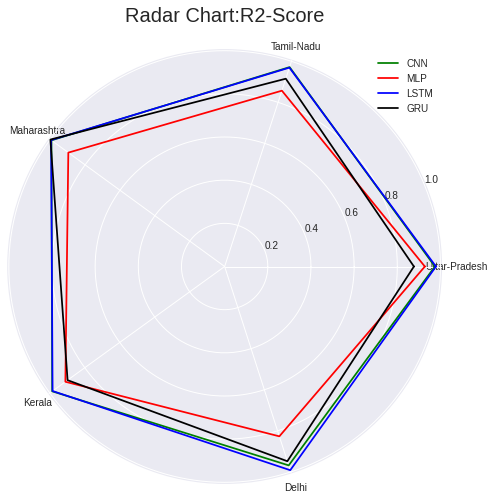

In [ ]:
radar_chart(states,r2_score['CNN'],r2_scores['MLP'],r2_scores['LSTM'],r2_scores['GRU'],title="R2-Score")

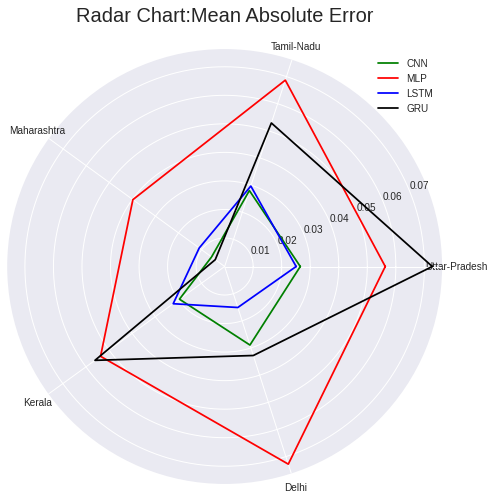

In [ ]:
radar_chart(states,mae['CNN'],mae['MLP'],mae['LSTM'],mae['GRU'],title="Mean Absolute Error")

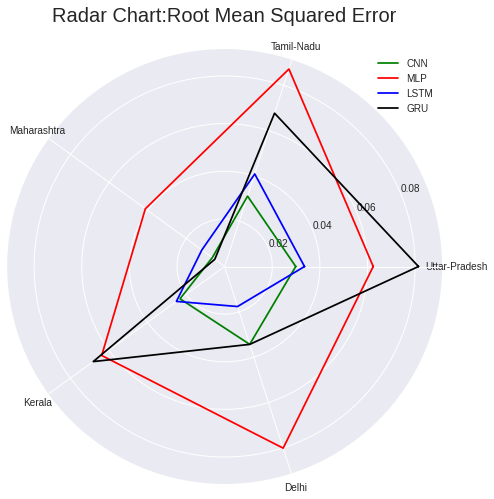

In [ ]:
radar_chart(states,rmse['CNN'],rmse['MLP'],rmse['LSTM'],rmse['GRU'],title="Root Mean Squared Error")